In [158]:
import pandas as pd
from pandas import Series, DataFrame
import datetime 
from datetime import datetime

disney_p = pd.read_csv('/Users/chereowang27/NYCDSA/Python_Intro_Project/data/disney_plus_shows.csv', header=0)
netflix = pd.read_csv('/Users/chereowang27/NYCDSA/Python_Intro_Project/data/netflix_list.csv', header=0)

#convert added at date from str to datetime, make variable for the year, and month-year
disney_p['added_at'] = disney_p["added_at"].apply(lambda s: datetime.strptime(s, "%d-%b-%y"))
disney_p['added_atyear'] = disney_p['added_at'].apply(lambda s: s.strftime('%y'))
disney_p['added_atmonth_year'] = disney_p['added_at'].apply(lambda s: s.strftime('%b-%y'))
disney_p['added_atmonth_year_new'] = pd.to_datetime(disney_p['added_atmonth_year'], format = '%b-%y')

#convert runtime & imdb_rating to numeric
disney_p['runtime'] = disney_p['runtime'].str.split(' ')
disney_p['runtime'] = [pd.to_numeric(val[0:1]) if hasattr(val, '__iter__') else None for val in disney_p["runtime"]]

disney_p['data'] = 'Disney_plus'
netflix['data'] = 'Netflix'
#disney_p['added_atmonth_year'] =  disney_p['added_atyear'].apply(lambda s: datetime.date(s.month, s.year))

hyphen = disney_p['year'].str.split(pat = '-', expand = True ).loc[30,0][4]
df_year = disney_p['year'].str.split(pat = hyphen, expand = True ) \
            .rename(columns = {0:'yearStart', 1: 'yearEnd'})
       

disney_p = pd.concat([disney_p,df_year], axis = 1)

#count the number of movies in each genre
d_movie = disney_p[disney_p['type']=='movie']
nf_movie = netflix[(netflix['type']=='movie')|(netflix['type']=='tvMovie')&(netflix['startYear'] < 2020)].rename(columns={'genres':'genre','startYear': 'added_atyear'})

# allMovie = pd.concat([d_movie[['imdb_id','rating', 'genre', 'added_atyear','data']],nf_movie[['imdb_id','rating','genre','added_atyear','data']]])
# allMovie.reindex()


In [159]:
countries = set(d_movie['country'].str.cat(sep = ', ').split(', '))


In [160]:
#d_movie['country']

# This counts the number of titles in each genre
def c_count(col,c):
    return col.str.contains(c).sum()

# This generates a data frame of counts of each genre by time (either month or year)
def agg_df(group):
    agg_df = []
    for c in countries:
        tmp = d_movie.groupby(group).agg(
            **{c : ('country', lambda col: c_count(col,c))}
        )
        agg_df.append(tmp)
    df_agg = pd.concat(agg_df, axis=1).apply(lambda col: col.cumsum())
    return df_agg

In [167]:
#this counts the n
df_by_year_T = agg_df('added_atyear').T.reset_index()
df_by_year_T.columns = ['Country', '2019', '2020']
df_by_year_T['isUS'] = df_by_year_T['Country'].isin(["USA"])
df_by_year_T.groupby('isUS').agg('sum')


,2019,2020
isUS,,
False,144,159
True,576,661


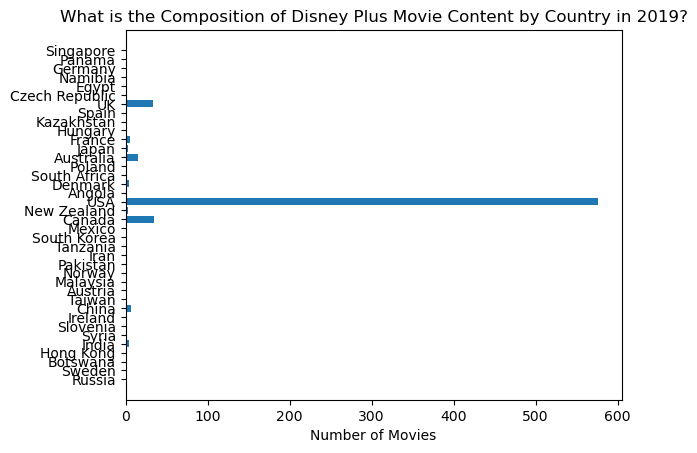

In [23]:
# Histogram of # of movies by country in year 2019 and 2020
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(df_by_year_T['Country'], df_by_year_T['2019'], align='center')
ax.set_yticks(df_by_year_T['Country'])
ax.set_yticklabels(df_by_year_T['Country'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Movies')
ax.set_title('What is the Composition of Disney Plus Movie Content by Country in 2019?')

plt.show()

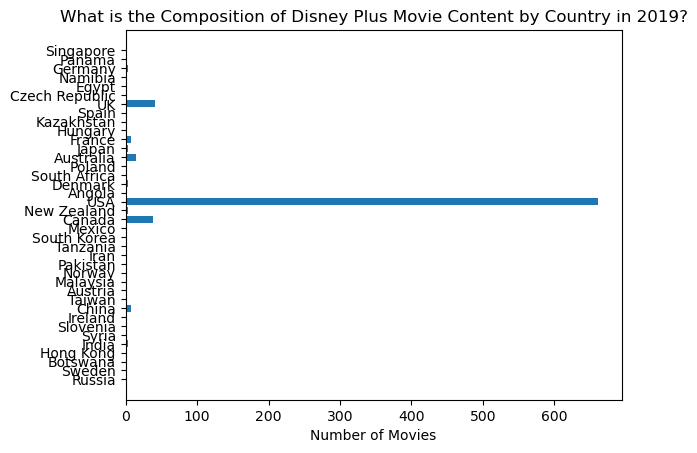

In [24]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(df_by_year_T['Country'], df_by_year_T['2020'], align='center')
ax.set_yticks(df_by_year_T['Country'])
ax.set_yticklabels(df_by_year_T['Country'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Movies')
ax.set_title('What is the Composition of Disney Plus Movie Content by Country in 2019?')

plt.show()

In [183]:
countries = set(nf_movie['orign_country'].str.cat(sep = ',').split(','))



In [184]:
            
# This counts the number of titles in each genre
def c_count(col,c):
    return col.str.contains(c).sum()

# This generates a data frame of counts of each genre by time (either month or year)
def agg_df(group):
    agg_df = []
    for c in countries:
        tmp = nf_movie.groupby(group).agg(
            **{c : ('orign_country', lambda col: c_count(col,c))}
        )
        agg_df.append(tmp)
    df_agg = pd.concat(agg_df, axis=1).apply(lambda col: col.cumsum())
    return df_agg



In [185]:
nf_byyr = agg_df('added_atyear')

,Ghana,Czech Republic,Tunisia,Thailand,Peru,China,Hungary,-,Romania,Bahamas,...,Russia,Egypt,Argentina,Paraguay,Canada,Italy,Georgia,Malaysia,Germany,Spain
added_atyear,,,,,,,,,,,,,,,,,,,,,
1932.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1933.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1938.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1941.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1945.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
nf20 = nf_byyr.T.reset_index().iloc[:,:-2]
nf20 = nf20.rename(columns = {'index':'Country Origin'})
# nf19.columns[1:]

# col = ''
# for yr in enumerate(nf19.columns[1:]):
#        col+str(int(yr))
            
#int(nf19.columns[1])
nf19 = nf_byyr.T.reset_index()[['index', 2019.0]]
nf19['isUS'] = (nf19['index']=='USA')


added_atyear,index,2019.0,isUS


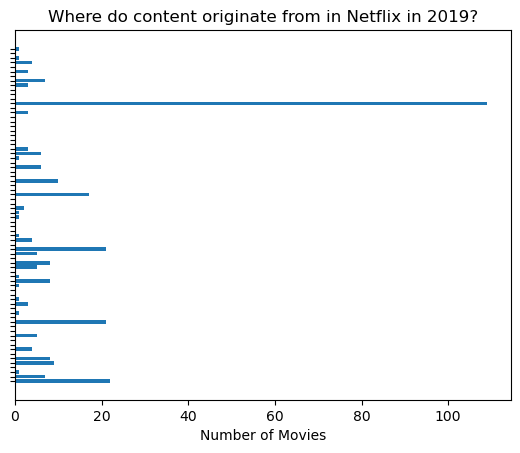

In [157]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(nf20['Country Origin'], nf20[2019.0], align='center')
ax.set_yticks(nf20['Country Origin'])
ax.set_yticklabels(nf20['Country Origin'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Movies')
ax.set_title('Where do content originate from in Netflix in 2019?')

plt.show()